<a href="https://colab.research.google.com/github/Rhayem1920/ARX_Project/blob/main/Final_Technical_Test_Kaiko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# common libraries for data engineering and machine learning tasks
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
# ignore warnings  
import warnings
warnings.filterwarnings('ignore')


# rectifying visualistaion's parameters to have pretty plots
font={'size': 14,
        'weight' : 'bold',
        'family':'monospace'} # weight could be book,bold etc ...
mpl.rc('font',**font)
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
plt.rcParams["figure.figsize"] = (12,8)
sns.set_style('darkgrid')

# Technical Test 
### Kaiko, Data Analyst Intern Position
For this test, you will work with data provided by Kaiko's API services. This data is market data retrieved on cryptocurrency exchanges. The objective of this test is to evaluate your python skills and your ability to solve a data analyst every day problem by creating solutions using this programming language. The private API key you'll need to use for this test is the following : 8eaf73c41adc6a82a1eb94cc6428ad34. It gives you access to all data you'll need for this data. Historical data is however limited to January 1st, 2021. This API key has been exclusively created for this test, and shouldn't be used for any other usage by the candidate. Finally, you're free to use any packages you wish for this exercise, as long as they are open source and free to install.

The asignment has to be given back as a python jupyter notebook before Tuesday the 16th of February 2022. For any questions about this test, don't hesitate to contact Théo Lafitte at theo.lafitte@kaiko.com. Please be carreful to comment your code, so the reader will be able to understand each steps or your reasoning. Once finished, you can send this completed jupyter notebook to theo.lafitte@kaiko.com.

# Exercise 1 : Gaps in Kaiko's Data
## 1.1 Extract Data from Kaiko's API

Use Case : One Kaiko's client complains about some gaps in the USD Exchange Rates he extracted from Kaiko's API. Kaiko's product team has therefore to check if there are actually gaps in the requested data, and for which period of time. By using Kaiko's API documentation, you're invited to find a way to extract through python, USD exchange rates for the pairs 'weth-usd' and 'owl-usd' at an hourly frequency, from January 1st, 2021. The endpoint you'll need to work with is the following : https://docs.kaiko.com/#cross-price. The data has to be printed as a dataframe.

In addition, don't hesitate to consult Kaiko's instrument explorer to get a full list of the instruments provided by kaiko (exchanges, assets). https://instruments.kaiko.com/#/instruments


In [3]:
# import libraries to get data 
import requests
import time  
import datetime

#### **The Data for Exchange Rate for both two pairs is collected from 01-01-2021 to 31-08-2021**

## **Get data for Weth-USD Exchange Rate**





In [4]:
# we are not able to extract more than 1000 rows per iteration

# I used the for_loop to extract continuously data from first january to first september 2021

start_time=['2021-01-01T00:00:00Z','2021-02-11T16:00:00Z','2021-03-25T08:00:00Z','2021-05-06T00:00:00Z','2021-06-16T16:00:00Z','2021-07-28T08:00:00Z','2021-08-30T23:00:00Z']
list_dataframes=[]
for start in start_time:
 # headers
 headers={'X-Api-Key': '8eaf73c41adc6a82a1eb94cc6428ad34','Accept': 'application/json','Accept-Encoding': 'gzip'}  

 #url with interval=1h frequency , start_time is 1/1/2021, we can pick at max 1000 rows it means end_time will be 11/02/2021
 url='https://us.market-api.kaiko.io/v2/data/trades.v1/spot_exchange_rate/weth/usd?sources=false&interval=1h&start_time='+start+'&page_size=1000&sort=asc'

 # Make API call
 response=requests.get(url,headers=headers).json()

 #Get data from dictionary
 J = response['data']

 #get the json File
 from pandas import json_normalize 
 df = json_normalize(J)

 # Create dataframe
 for i in range(len(df)):
  df['timestamp'][i] = datetime.datetime.fromtimestamp(df.timestamp[i] / 1e3) # from timestamp to datetime type
 df['date'] = pd.to_datetime(df['timestamp'])  
 dts = df[['date','price']]
 #Rename columns
 dts = dts.rename(columns={'price': 'weth-usd Exch_Rate'})
 list_dataframes.append(dts)

In [5]:
df1=list_dataframes[0]
df1=df1.append(list_dataframes[1:],ignore_index=True)
df1

,date,weth-usd Exch_Rate
0,2021-01-01 00:00:00,739.3695737507435
1,2021-01-01 01:00:00,742.8239091194993
2,2021-01-01 02:00:00,746.3824653037367
3,2021-01-01 03:00:00,749.2396928557619
4,2021-01-01 04:00:00,745.4265536957254
...,...,...
5804,2021-08-30 20:00:00,3333.68003584869
5805,2021-08-30 21:00:00,3324.6318067559764
5806,2021-08-30 22:00:00,3298.2464586188908
5807,2021-08-30 23:00:00,3248.705043602148


## **Get data for owl-USD Exchange Rate**


In [75]:
start_time=['2021-01-01T00:00:00Z','2021-02-11T16:00:00Z','2021-03-25T08:00:00Z','2021-05-06T00:00:00Z','2021-06-16T16:00:00Z','2021-07-28T08:00:00Z','2021-08-30T23:00:00Z']
list_dataframes=[]
for start in start_time:
 # headers
 headers={'X-Api-Key': '8eaf73c41adc6a82a1eb94cc6428ad34','Accept': 'application/json','Accept-Encoding': 'gzip'}  

 #url with interval=1h frequency , start_time is 1/1/2021, we can pick at max 1000 rows it means end_time will be 11/02/2021
 url='https://us.market-api.kaiko.io/v2/data/trades.v1/spot_exchange_rate/owl/usd?sources=false&interval=1h&start_time='+start+'&page_size=1000&sort=asc'

 # Make API call
 response=requests.get(url,headers=headers).json()

 #Get data from dictionary
 J = response['data']

 #get the json File
 from pandas import json_normalize 
 df = json_normalize(J)

 # Create dataframe
 for i in range(len(df)):
  df['timestamp'][i] = datetime.datetime.fromtimestamp(df.timestamp[i] / 1e3) # from timestamp to datetime type
 df['date'] = pd.to_datetime(df['timestamp'])  
 dts = df[['date','price']]
 #Rename columns
 dts = dts.rename(columns={'price': 'owl-usd Exch_Rate'})
 list_dataframes.append(dts)

In [76]:
df2=list_dataframes[0]
df2=df2.append(list_dataframes[1:],ignore_index=True)
df2

,date,owl-usd Exch_Rate
0,2021-01-01 00:00:00,1.01260604661675
1,2021-01-01 01:00:00,None
2,2021-01-01 02:00:00,None
3,2021-01-01 03:00:00,None
4,2021-01-01 04:00:00,None
...,...,...
5804,2021-08-30 20:00:00,None
5805,2021-08-30 21:00:00,None
5806,2021-08-30 22:00:00,None
5807,2021-08-30 23:00:00,None


## **Get the Final Dataset by Merging the last two dataframes**

In [8]:
df_final=pd.merge(df1,df2,on='date')
df_final

,date,weth-usd Exch_Rate,owl-usd Exch_Rate
0,2021-01-01 00:00:00,739.3695737507435,1.01260604661675
1,2021-01-01 01:00:00,742.8239091194993,None
2,2021-01-01 02:00:00,746.3824653037367,None
3,2021-01-01 03:00:00,749.2396928557619,None
4,2021-01-01 04:00:00,745.4265536957254,None
...,...,...,...
5806,2021-08-30 22:00:00,3298.2464586188908,None
5807,2021-08-30 23:00:00,3248.705043602148,None
5808,2021-08-30 23:00:00,3248.705043602148,None
5809,2021-08-30 23:00:00,3248.7050436021473,None


In [9]:
# Turn our data to numeric type
cols=df_final.columns.tolist()[1:]
for col in cols:
  df_final[col]=pd.to_numeric(df_final[col])

## 1.2 Vizualise Kaiko's Exchange Rates data
You're now invited to provide the Kaiko's support team some vizualization of the gaps observed for the two pairs.

In [41]:
# plot feature's histtplot
def dist_plot(df,feature):
    plt.rcParams["figure.figsize"] = (20,20)
    with sns.axes_style('darkgrid'):
        ax=sns.distplot(x=df[feature],hist=True,rug=True, hist_kws={"linewidth": 2,"edgecolor":'w'},kde_kws={'linewidth':5},bins=50)
        plt.ylabel(feature,fontsize=14)
        plt.xlabel(xlabel=None)
        plt.xticks(rotation=9)
        plt.grid(b=True)

#plot missing values bar chart
def missing_bar_chart(df):
  import missingno as msno
  msno.bar(df,color='indigo')



## **Gaps meaning is not so clear, for me there are two meanings for this**

1. **there were some days(or hours) where Exchange rates was not provided(missing values in the dataset)**

2. **There were some days (or hours) where Exchange rate reached some Extreme values (strange values, not frequent values) which are considered as anomalies**


## **I will try during visualisation to take into account both approaches to highlight gaps in the Exchange Rates**

### **Distplot for both two pairs**

Text(0.2, 1, 'possible anomalies')

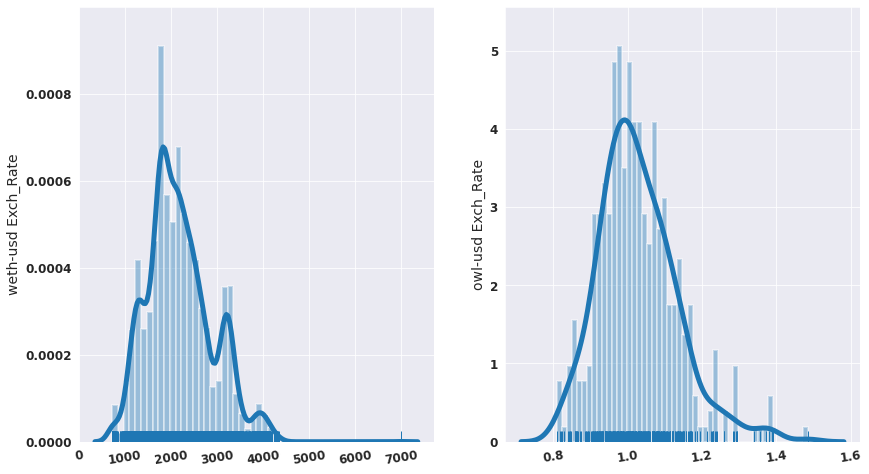

In [11]:
plt.subplot(1,2,1) 
dist_plot(df_final,'weth-usd Exch_Rate')
plt.subplot(1,2,2)
dist_plot(df_final,'owl-usd Exch_Rate') 
plt.annotate('possible anomalies', xy=(0,0.25), xytext=(0.20,1), fontsize=12,
                arrowprops=dict(arrowstyle='->', ec='red', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

**Both distributions here are a little bit skewed: since anomalies are always considered as the less frequent values:**

**1. so let's say that through this distribution plot we have some anomalies (wrong data) between 4000usd and 5000usd and further near 7000usd for the weth-usd Exchange Rate chart**

**2. owl_usd:Here missing values are less clearwith an abrupt gap after 1.4 and a small bump at 0.8**


**--->Distributions plots gives the frequency of occurence of values in a dataframe , but they are not sufficient to detect outliers , and especially missing values**


### **Bar plot: checking missing _values**

**Missingno library gives good and clear visualisation about missing values in a pandas dataframe**



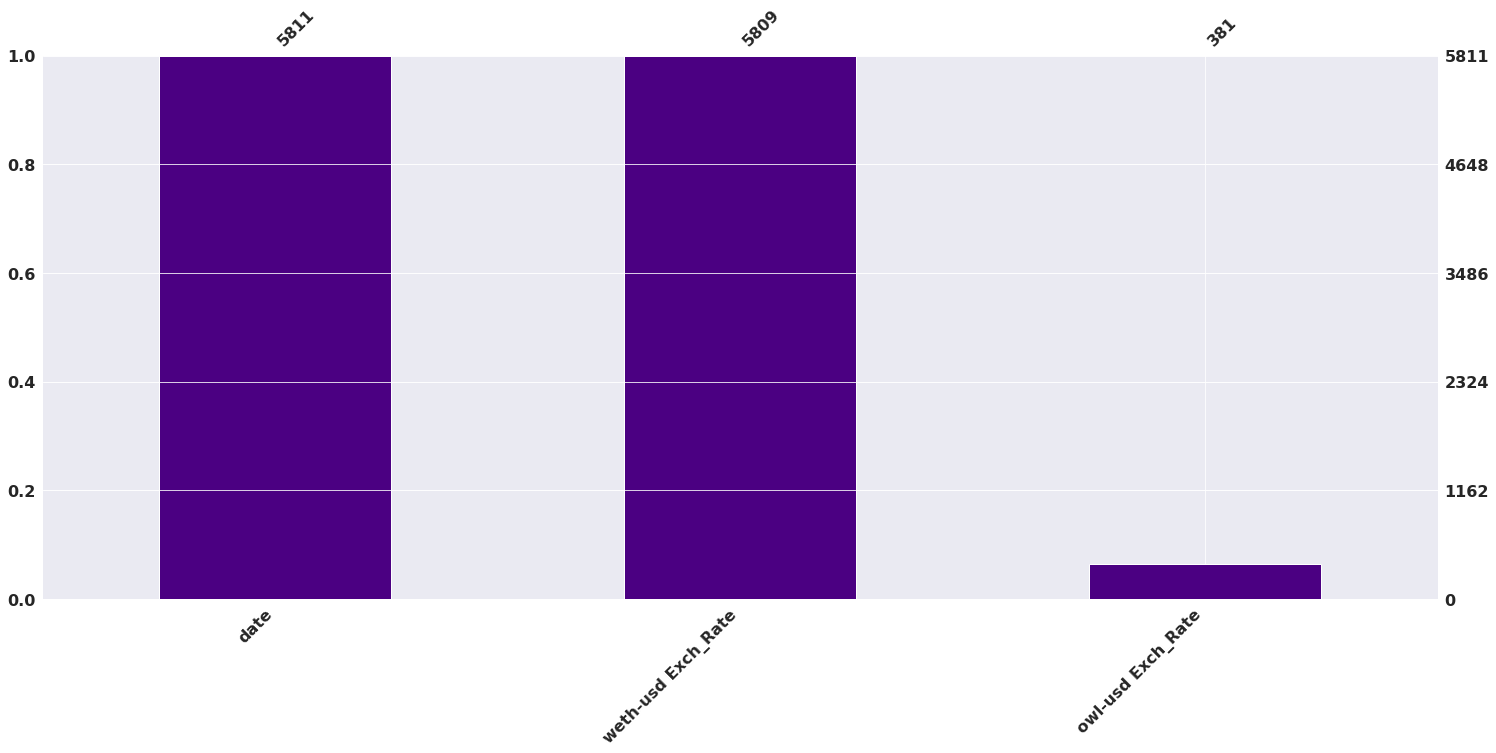

In [12]:
missing_bar_chart(df_final)

**We have only between 6% and 8% of values presentt between first january 2021 and end August for the owl-usd Echange Rate and the gap now is so clear**

**There is a huge gap in this pair owl_usd during this period**

###**By visualizing price data for this pair as a function of the date , we will be able to detect periods for which there are missing values in KAIKO's API**

In [78]:
df2['owl-usd Exch_Rate'] = df2['owl-usd Exch_Rate'].fillna(value=np.nan)


,date,owl-usd Exch_Rate
0,2021-01-01 00:00:00,1.01260604661675
1,2021-01-01 01:00:00,NaN
2,2021-01-01 02:00:00,NaN
3,2021-01-01 03:00:00,NaN
4,2021-01-01 04:00:00,NaN
...,...,...
5804,2021-08-30 20:00:00,NaN
5805,2021-08-30 21:00:00,NaN
5806,2021-08-30 22:00:00,NaN
5807,2021-08-30 23:00:00,NaN


In [83]:
import math
df3=df2.copy()    
df3['is_missing']=df3['owl-usd Exch_Rate'].astype(np.float64).apply(lambda x:math.isnan(x))
df3

,date,owl-usd Exch_Rate,is_missing
0,2021-01-01 00:00:00,1.01260604661675,False
1,2021-01-01 01:00:00,NaN,True
2,2021-01-01 02:00:00,NaN,True
3,2021-01-01 03:00:00,NaN,True
4,2021-01-01 04:00:00,NaN,True
...,...,...,...
5804,2021-08-30 20:00:00,NaN,True
5805,2021-08-30 21:00:00,NaN,True
5806,2021-08-30 22:00:00,NaN,True
5807,2021-08-30 23:00:00,NaN,True


Text(0.5, 1.0, 'Periods of Gaps (missing data)')

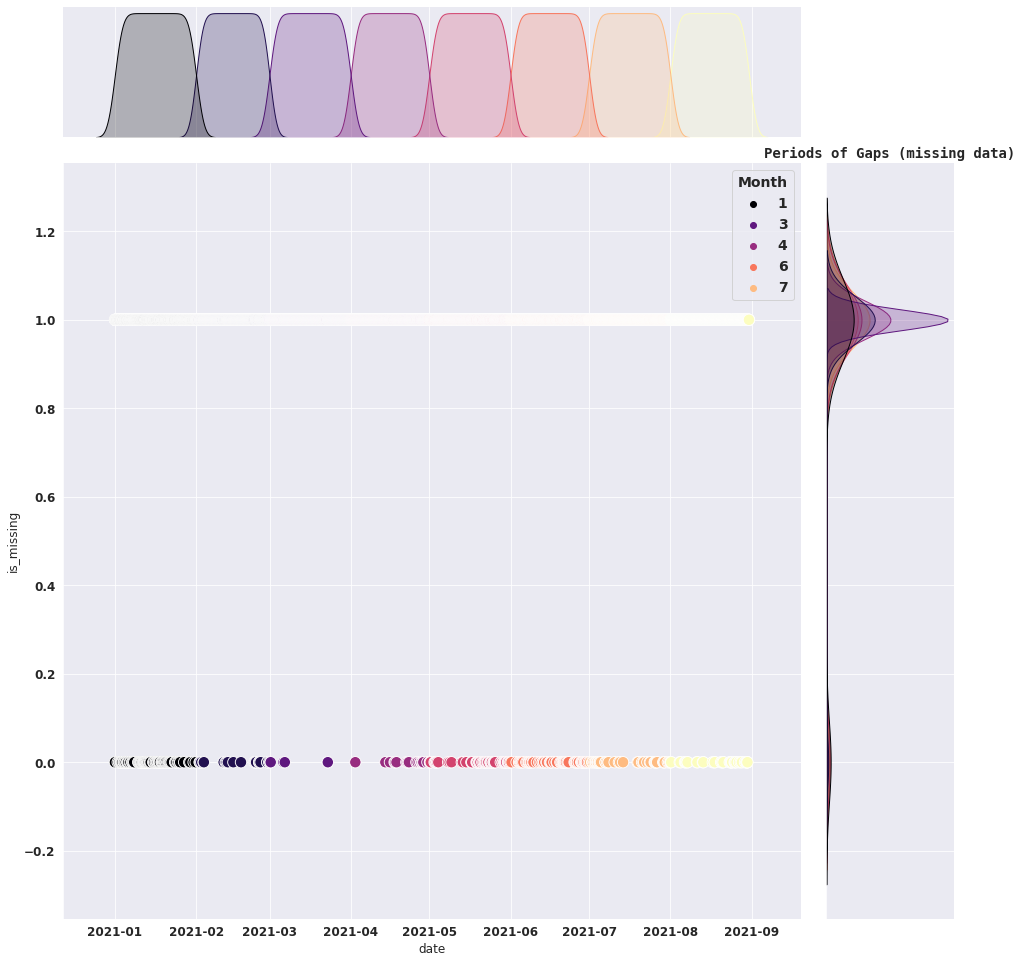

In [94]:
df3['Month'] = df3['date'].dt.month
df3['is_missing']=df3['is_missing'].replace(to_replace=[True,False],value=[1,0])
# plot owl-usd Exchange Rate
ax=sns.jointplot('date','is_missing',data=df3,kind='scatter',hue='Month',palette='magma',s=130)
fig = plt.gcf()
fig.set_size_inches(15, 15,forward=True)
plt.title('Periods of Gaps (missing data)',fontdict=font)



**For the pair owl-usd, we notice that we have practically missing data for this exchange for all months; Some data were present during March and April 2021 but the percentage of present data in the rest of months is very low**

**This will help Kaiko team to detect periods of missing data and try to solve the problem**

### **Let's check the percentage of present values in the dataset of owl-usd exchange rate**

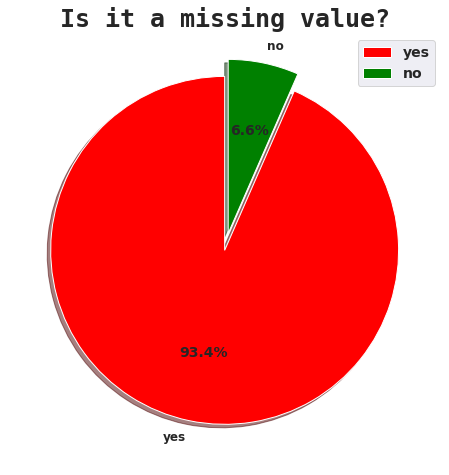

In [97]:
labels = ['yes','no'] 
size = df3['is_missing'].value_counts()
colors = ['red', 'green']
explode = [0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90, autopct='%.1f%%')
plt.title('Is it a missing value?', fontsize = 25,fontdict=font)
plt.legend()
plt.show()

**As expected, the percentage of present values doesn't exceed 6.6% . The data for this pair is rare for the period from 1 january to first September 2021**

### **Here we will try to consider that gaps are anomalies and outliers in the data**
#### **Scatter Plot to detect if there is gap in owl_usd Exchange Rate**

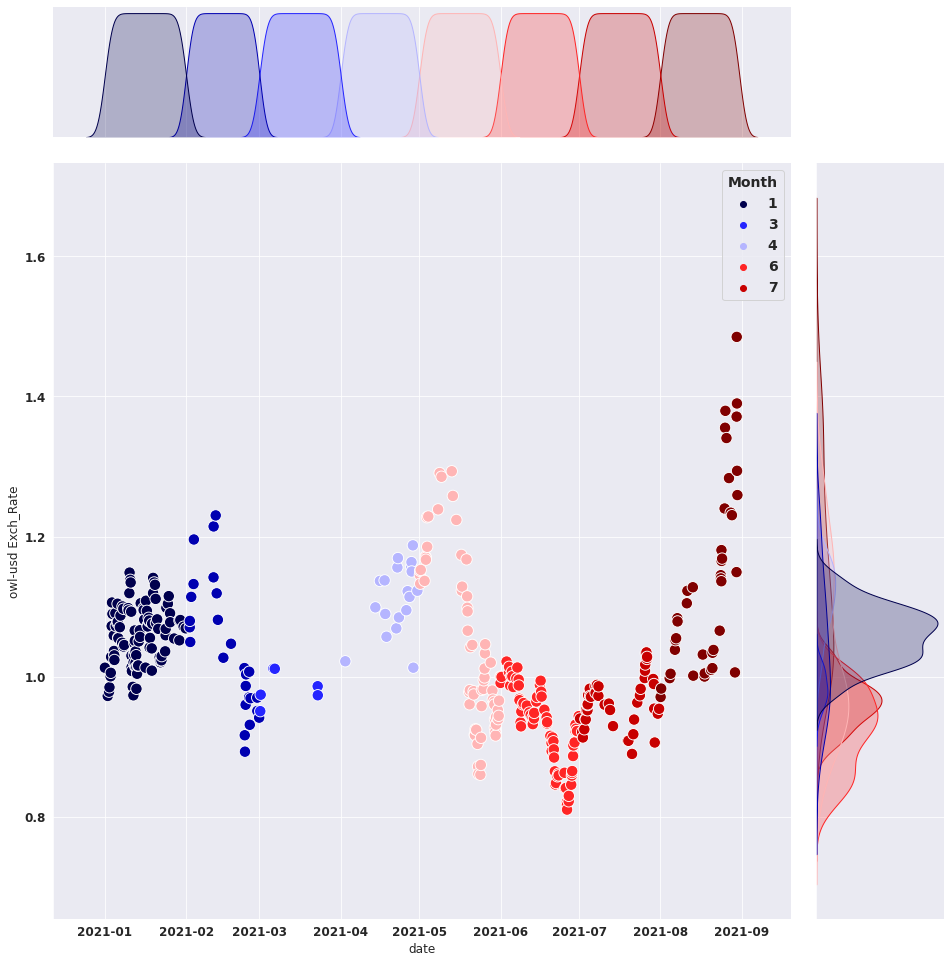

In [13]:
df=df_final.copy()
df['Month'] = df['date'].dt.month
# plot owl-usd Exchange Rate
ax=sns.jointplot('date','owl-usd Exch_Rate',data=df,kind='scatter',hue='Month',palette='seismic',s=130)
fig = plt.gcf()
fig.set_size_inches(15, 15,forward=True)



**1.The values of exchange rates for this pair seems regular and stable showing regular values in January , March ,April, June and July with small variations around the mean. we can not notice some strange values during this months**

**2.However, during February ( where we notice some missing data) , Mai , and especially August , obviously  rates are strongly oscillating and some extreme values appears since they are far from the others.**

**3.the density plot above show clearly the presence of these extreme values especially for rates that are above 1.2**

#### **Scatter Plot to detect if there is gap in weth_usd Exchange Rate**

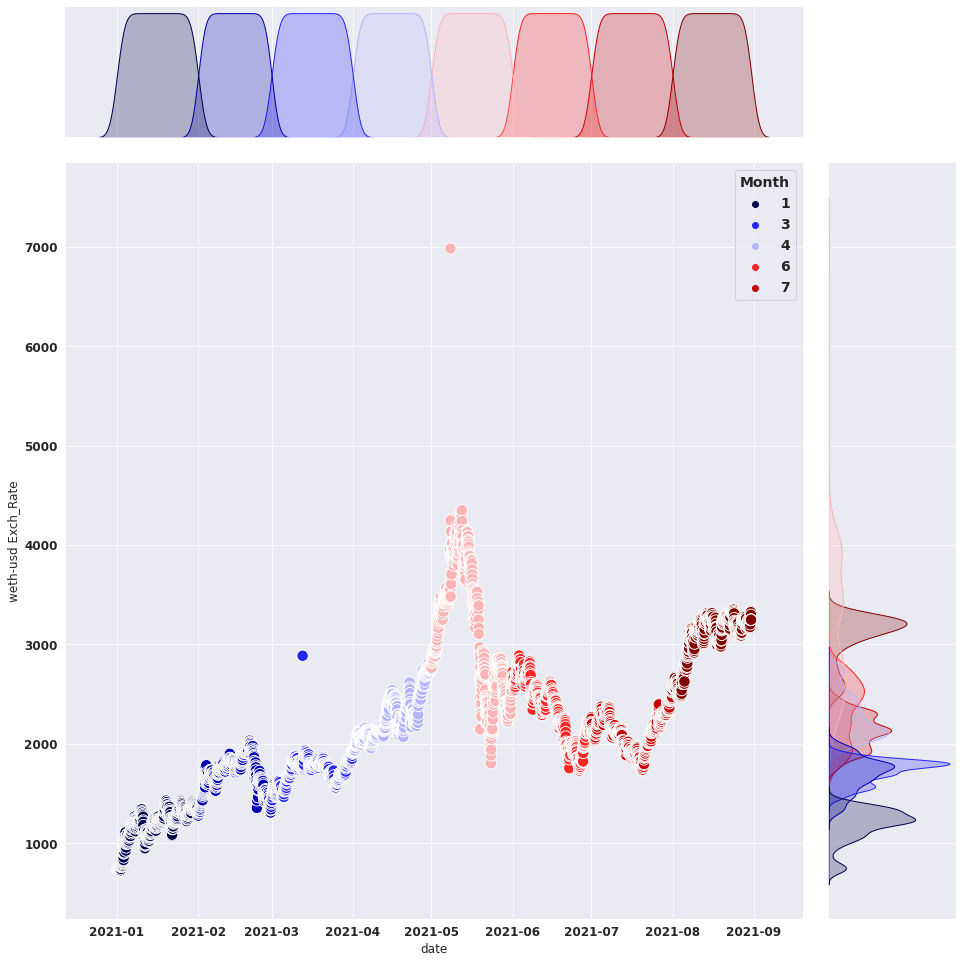

In [14]:
ax=sns.jointplot('date','weth-usd Exch_Rate',data=df,kind='scatter',hue='Month',palette='seismic',s=130)
fig = plt.gcf()
fig.set_size_inches(15, 15,forward=True)

**1.We can notice Two Extreme and suprisingly appeared points that draws attention as a gap in the data**

**2.these couple of outliers in the WETH-usd graph precisely near half March (one value at 3000 and the others are a little bit lower) and another in 12 Mai that is strangely very far from the normal range of all values**

**3.The weth-usd graph have a smoother distribution of values that follows an upword trend (values tend to rise ) and oscillate continuously where rising but is presenting two strange points that correspond to gaps in the this pair Exchange Rate**

### **Violinplot to detect outliers and gaps**

Text(0.5, 1.0, 'Anomaly Detection:OWL-USD')

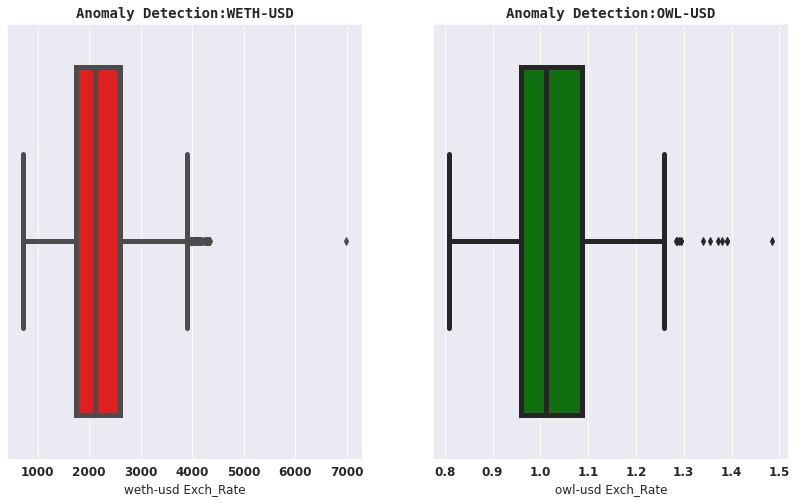

In [15]:
plt.subplot(1,2,1)
sns.boxplot(df_final['weth-usd Exch_Rate'],color='red',data=df_final)
plt.title('Anomaly Detection:WETH-USD',fontdict=font)
plt.subplot(1,2,2)
sns.boxplot(df_final['owl-usd Exch_Rate'],color='green',data=df_final)
plt.title('Anomaly Detection:OWL-USD',fontdict=font)


**This violinplot prooves our hypothesis while showing us were data tend to gather and the outliers are clearer here especially for the case of owl_usd Exchange Rate**

## 1.3 Analyse the gaps
By reading carefully Kaiko's API documentation about the used endpoint but also Kaiko's Data Dictionary, please provide an explanation of the gaps observed above. Are those gaps due to the calculation method used by Kaiko to provide synthetic exchange rates ?
The data dictionary : https://www.kaiko.com/pages/cryptocurrency-data-types

### **Answer**
**Kaiko's Cross Prices API endpoint returns the price of any crypto asset in USD, EUR, GBP, AUD, NZD, and 100+ of other fiat currencies even if this crypto asset is not directly traded in one of these fiat currencies**

**To do this, Kaiko make use of a synthetic exchange rate methodology for determining a cross rate, this cross rate is calculated based on the path of highest liquidity( whose gauge is the volume traded)**


**So gaps which are strange values may be due to a change of highest liquidity path , or more simple , it may be due to the calculation method of the synthethic exchange rate which is highly sensitive to a sudden change of highest liquidity path** 

# Exercise 2 : Understanding Crypto Markets Data
Kaiko provides an unnoficial python wrapper which allows you to easily get access to some major Kaiko's endpoints, as order book snapshots, order book aggregations, and Trades. Here, the github of the wrapper : https://github.com/sgheb/kaiko-api. To use this wrapper you'll need the API key provided by Kaiko for this Test.

## 2.1 Trades
You're invited for this exercise, to take a a deep look in Tick-Trades Data and extract it for the pair, exchange, and time range of your choice (5 days for example), using the Kaiko wrapper. This data has to be first printed as a dataframe.

In [16]:
!pip install kaiko
import kaiko 

## **Here , although I set interval to 1d , the data being scrapped has a frequency of 1_minute approximately**

**I Tried to solve the problems many times but it was not possible**



In [17]:
# Setting a client with my API key
kc = kaiko.KaikoClient(api_key='8eaf73c41adc6a82a1eb94cc6428ad34')

# Getting some simple daily Tick trades Data for the pair BTC-USD
ds = kaiko.TickTrades('lmax', 'btc-usd',interval='1d' ,start_time='2021-01' ,client=kc)

# Retrieve the dataframe containing the data
ds.df 

,trade_id,price,amount,taker_side_sell
timestamp,,,,
2021-01-01 00:00:03.040999936,3f6894e746e06c7983e3d53edb8cd7f23b742290761134...,29004.499,0.03,1.0
2021-01-01 00:00:03.040999936,79b1fa80cb7c960d29abb19b38867cf64553e5fbe7db4f...,29004.490,0.02,1.0
2021-01-01 00:00:03.040999936,d5cb89fe5882022f7969ca4dd5b9e2b163009c7ff27268...,29004.490,0.06,1.0
2021-01-01 00:00:03.163000064,98b640e5595479c98961b03bc0b5ae5a59ed37837101f2...,29003.500,0.62,0.0
2021-01-01 00:00:11.380999936,44a62ba70edeffedb286753d5a58987c15ecaebeddd8ce...,28991.500,0.49,1.0
...,...,...,...,...
2021-08-30 23:59:39.151000064,c856939677cfd58c6dd519d23c19bbdb99c42200a78adc...,46991.000,0.01,0.0
2021-08-30 23:59:39.632000000,cad66f5da838d38f8b90616e7071c40246fcd03402fe60...,46971.000,0.98,1.0
2021-08-30 23:59:53.048000000,fdafdc8a20b7cd23105c580b6bcb136cdf6106151efc63...,46994.000,0.02,0.0


In [18]:
df=ds.df
df=df.reset_index()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df=df[['date','price','amount','taker_side_sell']]
df

,date,price,amount,taker_side_sell
0,2021-01-01,29004.499,0.03,1.0
1,2021-01-01,29004.490,0.02,1.0
2,2021-01-01,29004.490,0.06,1.0
3,2021-01-01,29003.500,0.62,0.0
4,2021-01-01,28991.500,0.49,1.0
...,...,...,...,...
8342226,2021-08-30,46991.000,0.01,0.0
8342227,2021-08-30,46971.000,0.98,1.0
8342228,2021-08-30,46994.000,0.02,0.0
8342229,2021-08-30,46992.000,0.30,0.0


## 2.2 Vizualise Kaiko's Trade Data
Provide a clear and simple visualization of the extracted trades data. If you wish, you can provide a market analysis on the observations you get from the extracted data.

In [19]:
!pip install mplfinance

In [20]:
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import date2num 
from pylab import rcParams

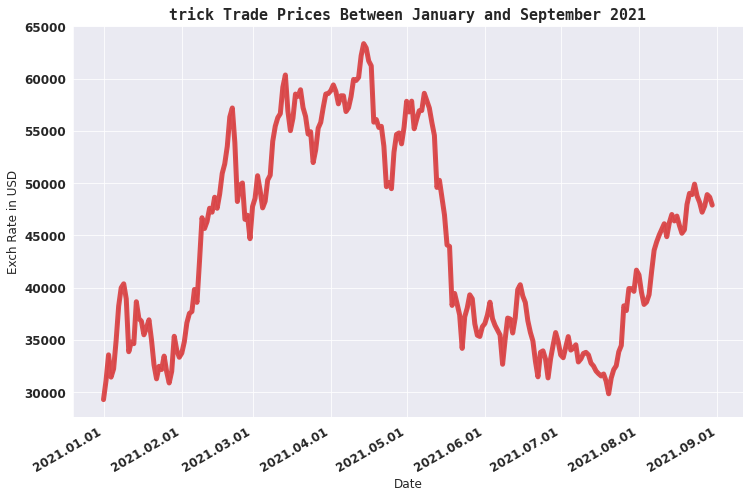

In [21]:
import matplotlib.dates as mdates
color = sns.color_palette()
#df['Date_mpl'] = df['Start_time'].dt.date
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x= df['date'].values,y = df['price'].values, alpha=0.8, color=color[3], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exch Rate in USD', fontsize=12)
plt.title("trick Trade Prices Between January and September 2021", fontsize=15,fontdict=font)
plt.show()


**the graph indicates a rise threw the first quarter of 2021 , a stable phase threw the first period of second quarter before a rapid decline threw the end of the second quartre and most of the third one.**


**we see a regain of value starting from august similar to that seen in the first quarter.***

**The well known rise of Bitcoin prices during the last spring of 2021 is clearly shown here**

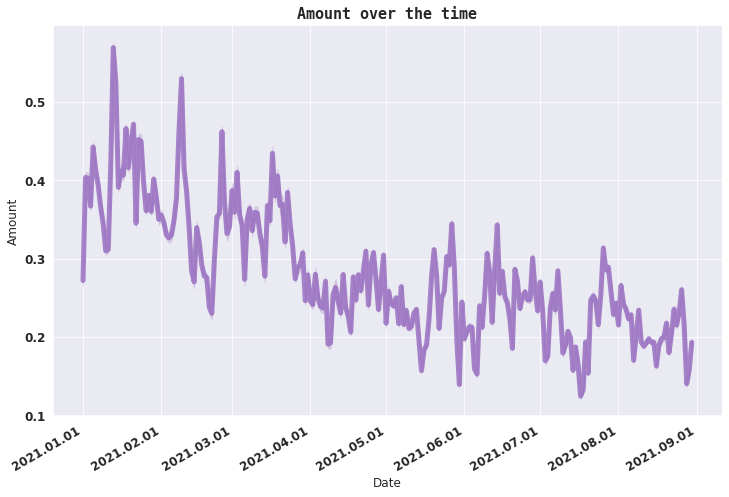

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x= df['date'].values,y = df.amount.values, alpha=0.8, color=color[4], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title("Amount over the time", fontsize=15,fontdict=font)
plt.show() 

**if we disrigard the noise  in the graph we can see a clear downword trend from 0.4 to 0.2 in the span of 9 months alongside a more stable fluctuation (from +- 0.25 to +-0.1)**

**The amount of bitcoin traded is clearly stable in the beginning of 2021 and it's progressively decreasing untill September. Many reasons should be behind this decrease ( High volatility of the bitcoin prices, sudden decrease of the price during the summer 2021 ...)**

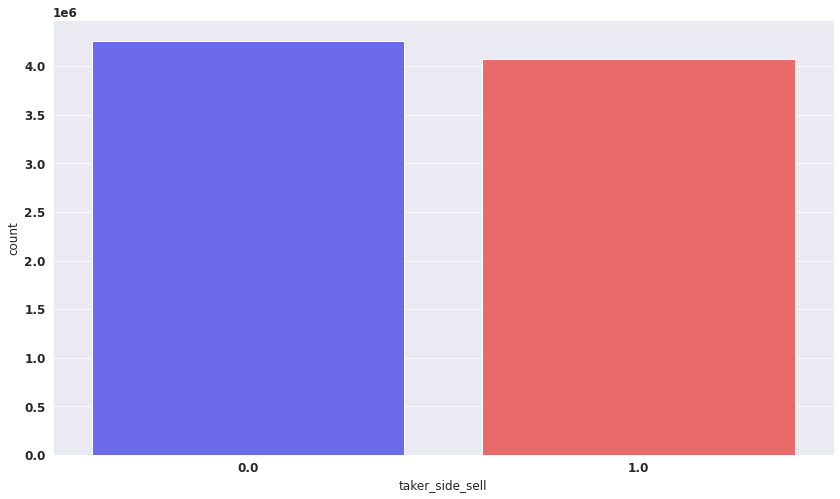

In [23]:
sns.countplot(df['taker_side_sell'],data=df,palette='seismic')

In [24]:
df['date']=pd.to_datetime(df['date'])

,date,price,amount,taker_side_sell
0,2021-01-01,29004.499,0.03,1.0
1,2021-01-01,29004.490,0.02,1.0
2,2021-01-01,29004.490,0.06,1.0


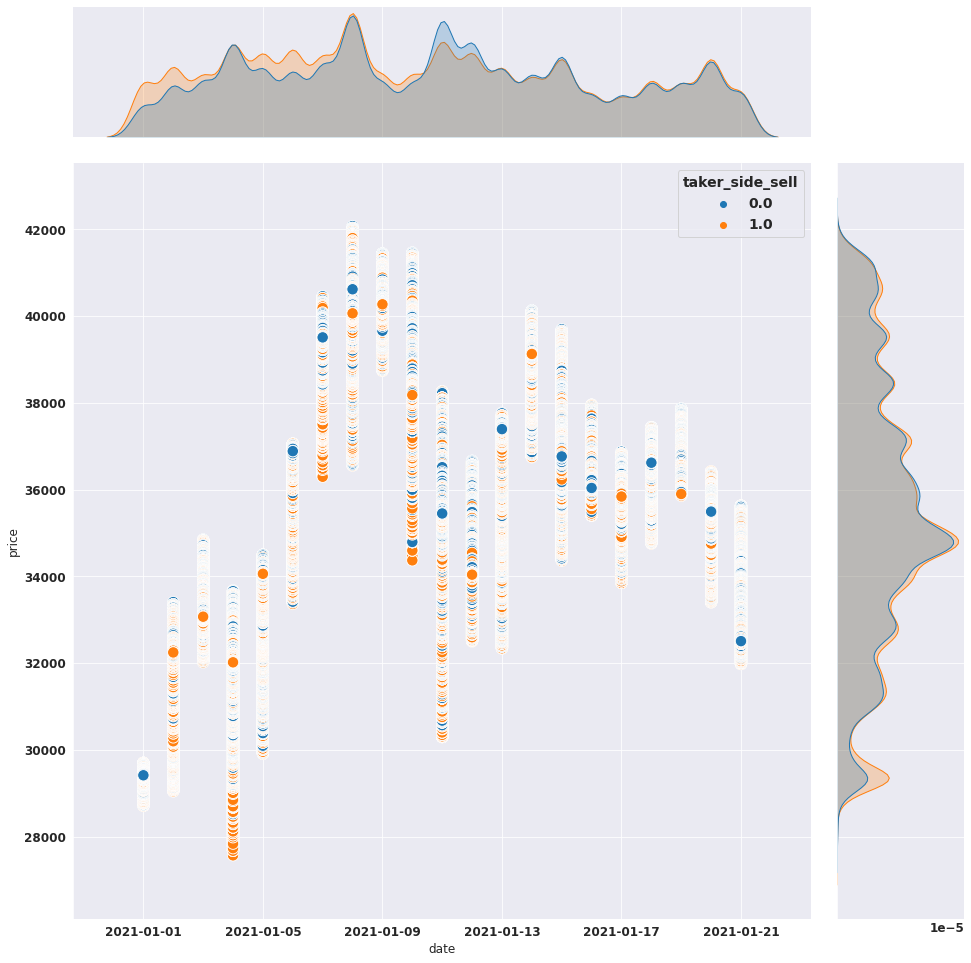

In [30]:
ax=sns.jointplot('date','price',data=df[:int(df.shape[0]/8)],kind='scatter',hue='taker_side_sell',s=130)
fig = plt.gcf()
fig.set_size_inches(15, 15,forward=True)

## 2.3 Definitions
By reading Kaiko's Data Dictionary, please provide short answers to the following questions:

A. What is the main difference between Order Books Data and Trades ?

**1.Order Books: An order book is a list containing all outstanding buy or sell orders for an asset, organized by price level**

**2.Trades: All executed transactions occurring on an exchange.**

**So the difference is When a consumer books an order, the order book records all of the essential information, including the price and quantity of the order.
Once it is completed and executed, an order is then entered into the trade book. The trade number is assigned to the completion, and once it is executed, the status reports in the trade book.**




B. How do you interpret the column "takers_sell_side" of the previously extracted dataframe on Trades ?

**1.Using Kaiko Dictioanry Data, with all trades including both a “buy” and a “sell” on either side of the transaction, we must know an additional information in order to make use of such data(whether a trader on the stated side of the transaction is a “maker” or a “taker.”)**

**2.Under the assumption that a taker’s sell order will always be filled by a maker’s buy order and a taker’s buy order will always be filled by a maker’s sell order**

**When “taker_side_sell” is set to “true” :this means that the “taker” was on the “sell” side of a maker’s buy order and it's recorded as a sell from a taker’s perspective.**

**When “taker_side_sell” is set to “false”:this means that a taker took the buy side of a maker’s sell order — a “taker” was not on the “sell” side of the transaction.**


C. Is there any interesting calculation you can provide using the variables present in the trades dataframe ?

**We can add specific momentum technical indicators such as Moving average(MA) & Exponential moving average(EMA) & Rate of change(ROC) & Stochastics oscillator indicators(%K,%D) & Momentun & finally Relative Strength index(RSI) using the price column**

# Exercise 3 : Creativity
This final part is made to test the applicant's capacities to innovate and use his/her tech and financial knowledge to investigate price distribution and anomaly detection. The aim is to explore different ways of detecting extreme values with different methods and summarize your results to provide interesting insights. Don't hesitate to use your statistics/econometrics/machine learning knowledge for this exercise. This will be much appreciated.

#### **I will work with OHLC Dataset and try to detect anomalies and extreme values using several methods**

In [31]:
# Setting a client with my API key
kc = kaiko.KaikoClient(api_key='8eaf73c41adc6a82a1eb94cc6428ad34')

# Getting some simple daily Tick trades Data for the pair BTC-USD
ds = kaiko.Candles('lmax', 'btc-usd',interval='1d' ,start_time='2021-01' ,client=kc)

# Retrieve the dataframe containing the data
ds.df 

,open,high,low,close,volume,price,count
timestamp,,,,,,,
2021-01-01,29004.499,29704.0,28714.5,29417.000,8650.79,29268.151687,31803.0
2021-01-02,29419.500,33408.5,29045.5,32248.499,17932.37,31238.392146,44420.0
2021-01-03,32219.000,34849.5,32017.0,33071.500,16745.15,33555.534121,41597.0
2021-01-04,33073.500,33678.0,27572.5,32020.500,25100.99,31341.852585,68404.0
2021-01-05,32021.000,34499.5,29912.5,34060.500,23945.11,32267.527806,54110.0
...,...,...,...,...,...,...,...
2021-08-26,49027.500,49363.5,46308.0,46864.000,7669.98,47196.058368,29483.0
2021-08-27,46857.000,49182.5,46367.5,49102.000,5834.74,47707.964097,27068.0
2021-08-28,49098.500,49309.8,48370.0,48907.500,2320.33,48908.653925,16562.0


In [32]:
df=ds.df
df=df.reset_index()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

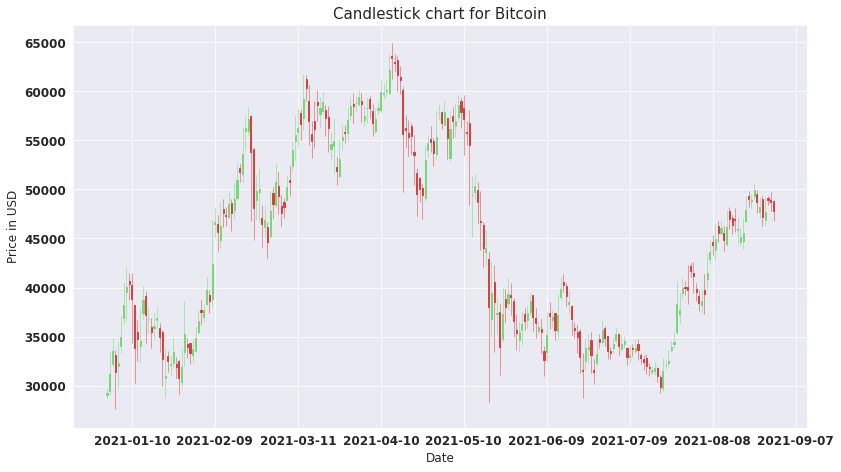

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))
df['num_date'] = df['date'].apply(date2num)
ohlc = []
for ind, row in df.iterrows():
    ol = [row['num_date'],row['open'], row['high'], row['low'], row['price'], row['volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

**This Candlestick chart show long positions opportunities in green and short position opportunities in red**

**Using this chart, it's obviously clear that BTC Prices shows a very high volatility and some extreme values that can be considerated as anomalies for this case**

### **Isolation Forest and Visualizing Outliers**

**How Isolation Forest is working?**


**IsolationForests were built based on the fact that anomalies are the data points that are few and different.**

**The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.**

**During scoring, a data point is traversed through all the trees which were trained earlier. Now, an ‘anomaly score’ is assigned to each of the data points based on the depth of the tree required to arrive at that point. This score is an aggregation of the depth obtained from each of the iTrees. An anomaly score of -1 is assigned to anomalies and 1 to normal points based on the contamination**





In [34]:
random_state = np.random.RandomState(42)
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
df=df[['date','open','high','low','close','volume','price','count']]      

model.fit(df[['price']])

print(model.get_params())
df['scores'] = model.decision_function(df[['price']])

df['is_anomaly'] = model.predict(df[['price']])

df_anomalies=df[df['is_anomaly']==-1].head()


{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7FA0F184B490, 'verbose': 0, 'warm_start': False}


In [35]:
df_anomalies.head()

,date,open,high,low,close,volume,price,count,scores,is_anomaly
0,2021-01-01,29004.499,29704.000,28714.5,29417.000,8650.79,29268.151687,31803.0,-0.207896,-1
1,2021-01-02,29419.500,33408.500,29045.5,32248.499,17932.37,31238.392146,44420.0,-0.027019,-1
3,2021-01-04,33073.500,33678.000,27572.5,32020.500,25100.99,31341.852585,68404.0,-0.002451,-1
8,2021-01-09,40635.000,41441.500,38737.0,40270.999,13956.55,40319.091439,40548.0,-0.014298,-1
21,2021-01-22,30828.000,33879.999,28800.0,33016.500,16476.75,31016.167023,47720.0,-0.029569,-1


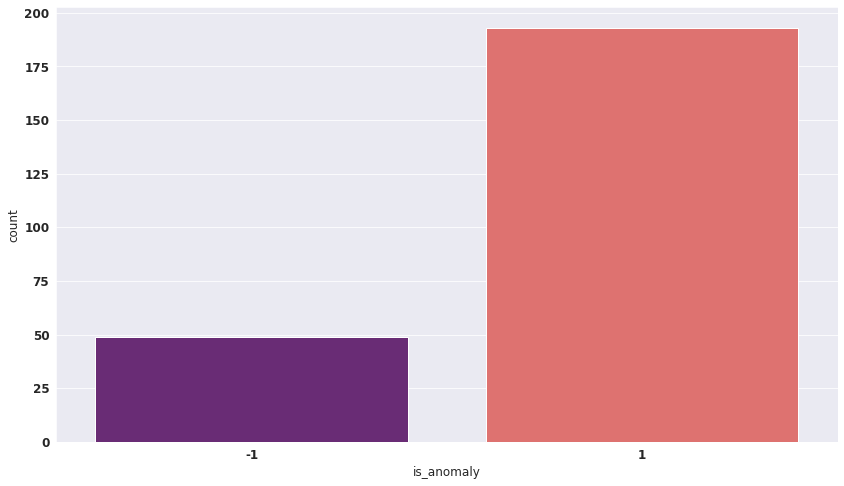

In [36]:
sns.countplot(df['is_anomaly'],data=df,palette='magma')

**Anomalies present aproximately the 20% of values in our dataset using isolation forest method**

In [37]:
df['date']=pd.to_datetime(df['date'])

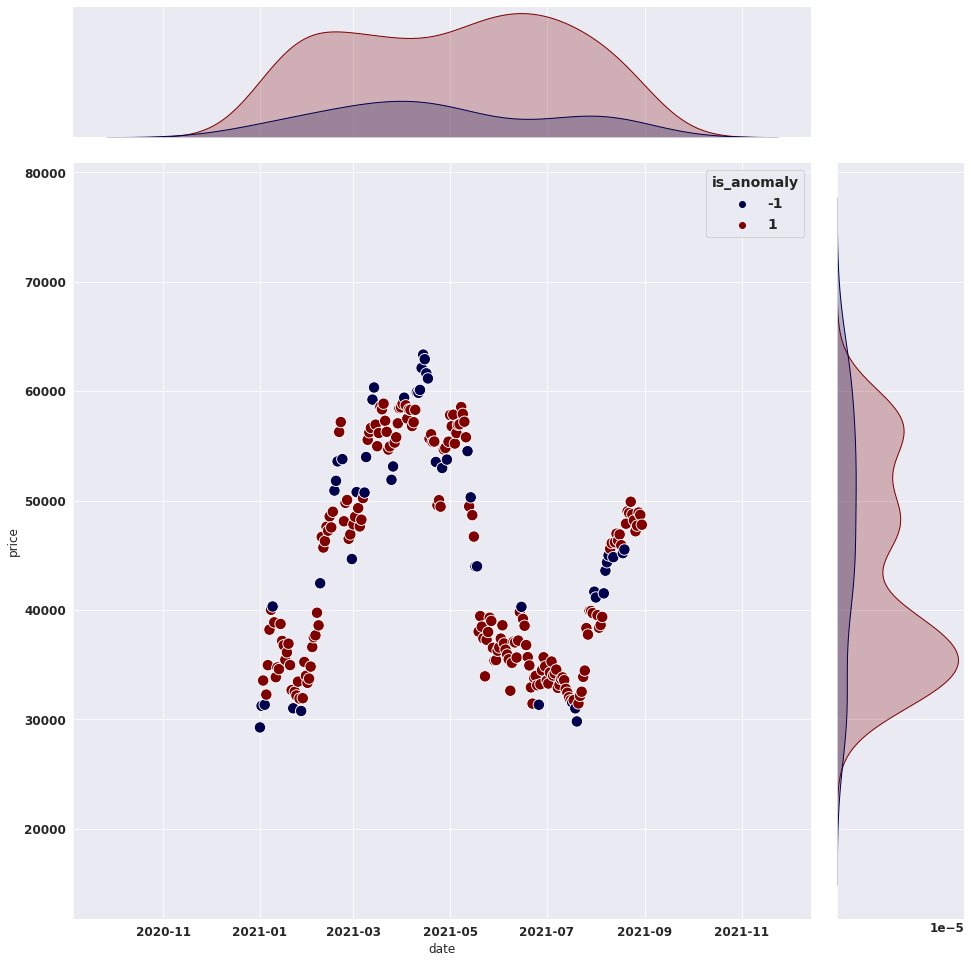

In [38]:
ax=sns.jointplot('date','price',data=df,kind='scatter',hue='is_anomaly',palette='seismic',s=130)
fig = plt.gcf()
fig.set_size_inches(15, 15,forward=True)


**This Graph shows that Isolation forest classified many normal values as extreme ones (outliers with value=-1) which shows the non efficiency of this approach especially on OHLC dataset where correlation between features is so high which is not good in general for Isolation Forests Models**

**Detecting Outliers using Distplot**

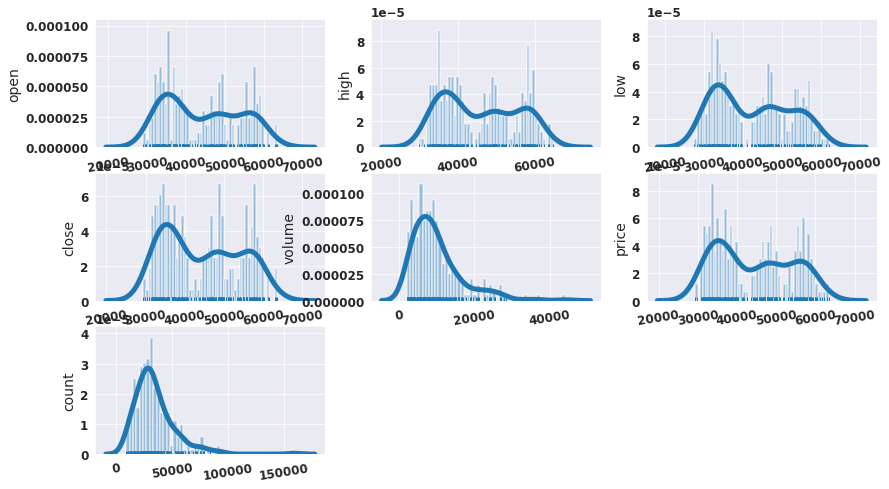

<Figure size 1440x1440 with 0 Axes>

In [42]:
features_to_display=df.columns.tolist()[1:8]
for i in range(1,8):
    plt.subplot(3,3,i)
    dist_plot(df,features_to_display[i-1])
    
plt.figure(facecolor='grey',edgecolor='black')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=200,
    hspace=100)

**Looking at different distribution plots for the features, we can notice that the distribution is skewed only for Volume and count columns and we see some values at the extreme right that are so far from the median and are not frequent at all**

**There are possible outliers in these zones for these two features**

### **Detecting Extreme values and anomalies using IQR Method and Boxplots**

**Boxplot are using IQR Method to detect possible outliers**

**How IQR Method is working to detect outliers through a boxplot visulaisation?**

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).


This type of plot is used to easily detect outliers. It can also tell us if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

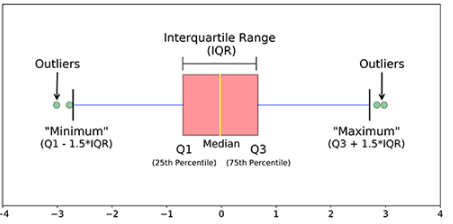

**median (Q2/50th Percentile):** the middle value of the dataset.


**first quartile (Q1/25th Percentile):**the middle number between the smallest number (not the “minimum”) and the median of the dataset.

**third quartile (Q3/75th Percentile):** the middle value between the median and the highest value (not the “maximum”) of the dataset.

**InterQuartile Range (IQR):** 25th to the 75th percentile. IQR tells how spread the middle values are.
“maximum”: Q3 + 1.5*IQR
“minimum”: Q1 -1.5*IQR

**Outliers:** (shown as green circles) In statistics, an outlier is an observation point that is distant from other observation

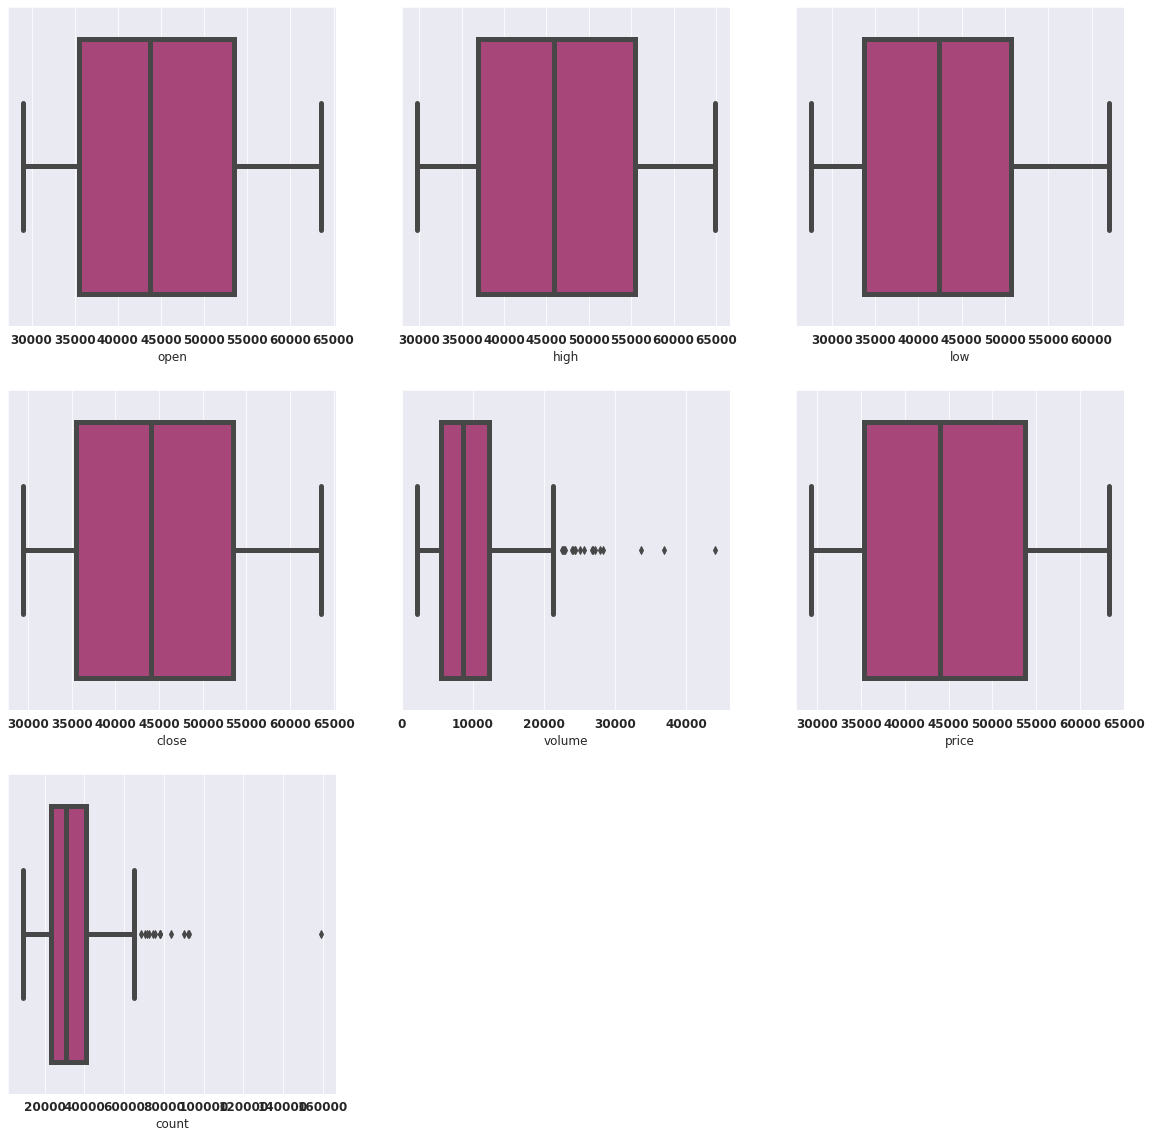

<Figure size 1440x1440 with 0 Axes>

In [43]:

features_to_display=df.columns.tolist()[1:8]
for i in range(1,8):
    plt.subplot(3,3,i)
    sns.boxplot(df[features_to_display[i-1]],palette='magma',data=df)
    
plt.figure(facecolor='grey',edgecolor='black')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=25,
    hspace=35)

**looking at these plots, there are only possible outliers detected using the IQR Method for the volume and count features**